#Pima Indians Diabetes

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as ex
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.shape


(768, 9)

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


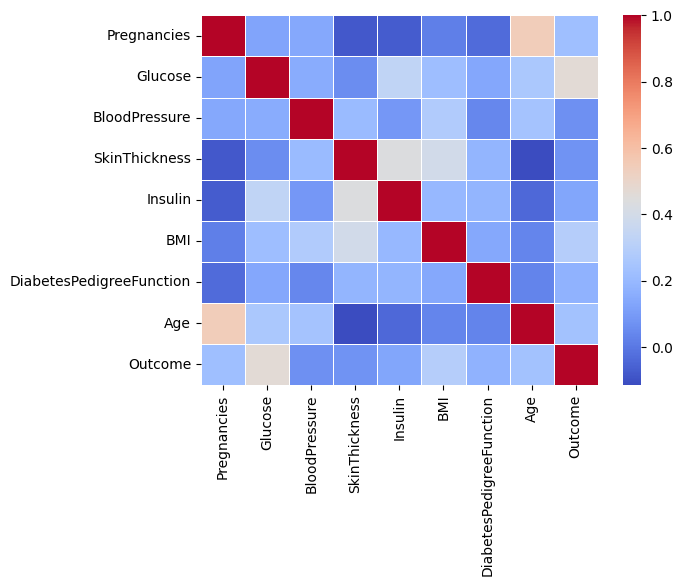

In [7]:
corr = df.corr()
plt.figure() #plot the heatmap for the correlation
sns.heatmap(corr,fmt=".5f", linewidth=.5, cmap="coolwarm")
plt.show() #the more darker color the more stronger correlation.

In [8]:
# Check for duplicates across all columns
duplicated = df.duplicated().sum()

# Print the number of duplicated instances
if duplicated == 0:
    print("Number of duplicated instances:", duplicated)
else:
# Print the duplicated instances
    print("Number of duplicated instances:", duplicated)
    print(df[duplicated])

Number of duplicated instances: 0


In [9]:
# print the percentage of missing values for instances.
total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
percent = ((df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) != 0]) * 100
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing['Percent'] = missing['Percent'].apply(lambda x: "%.2f%%" % x)
print(missing)

Empty DataFrame
Columns: [Total, Percent]
Index: []


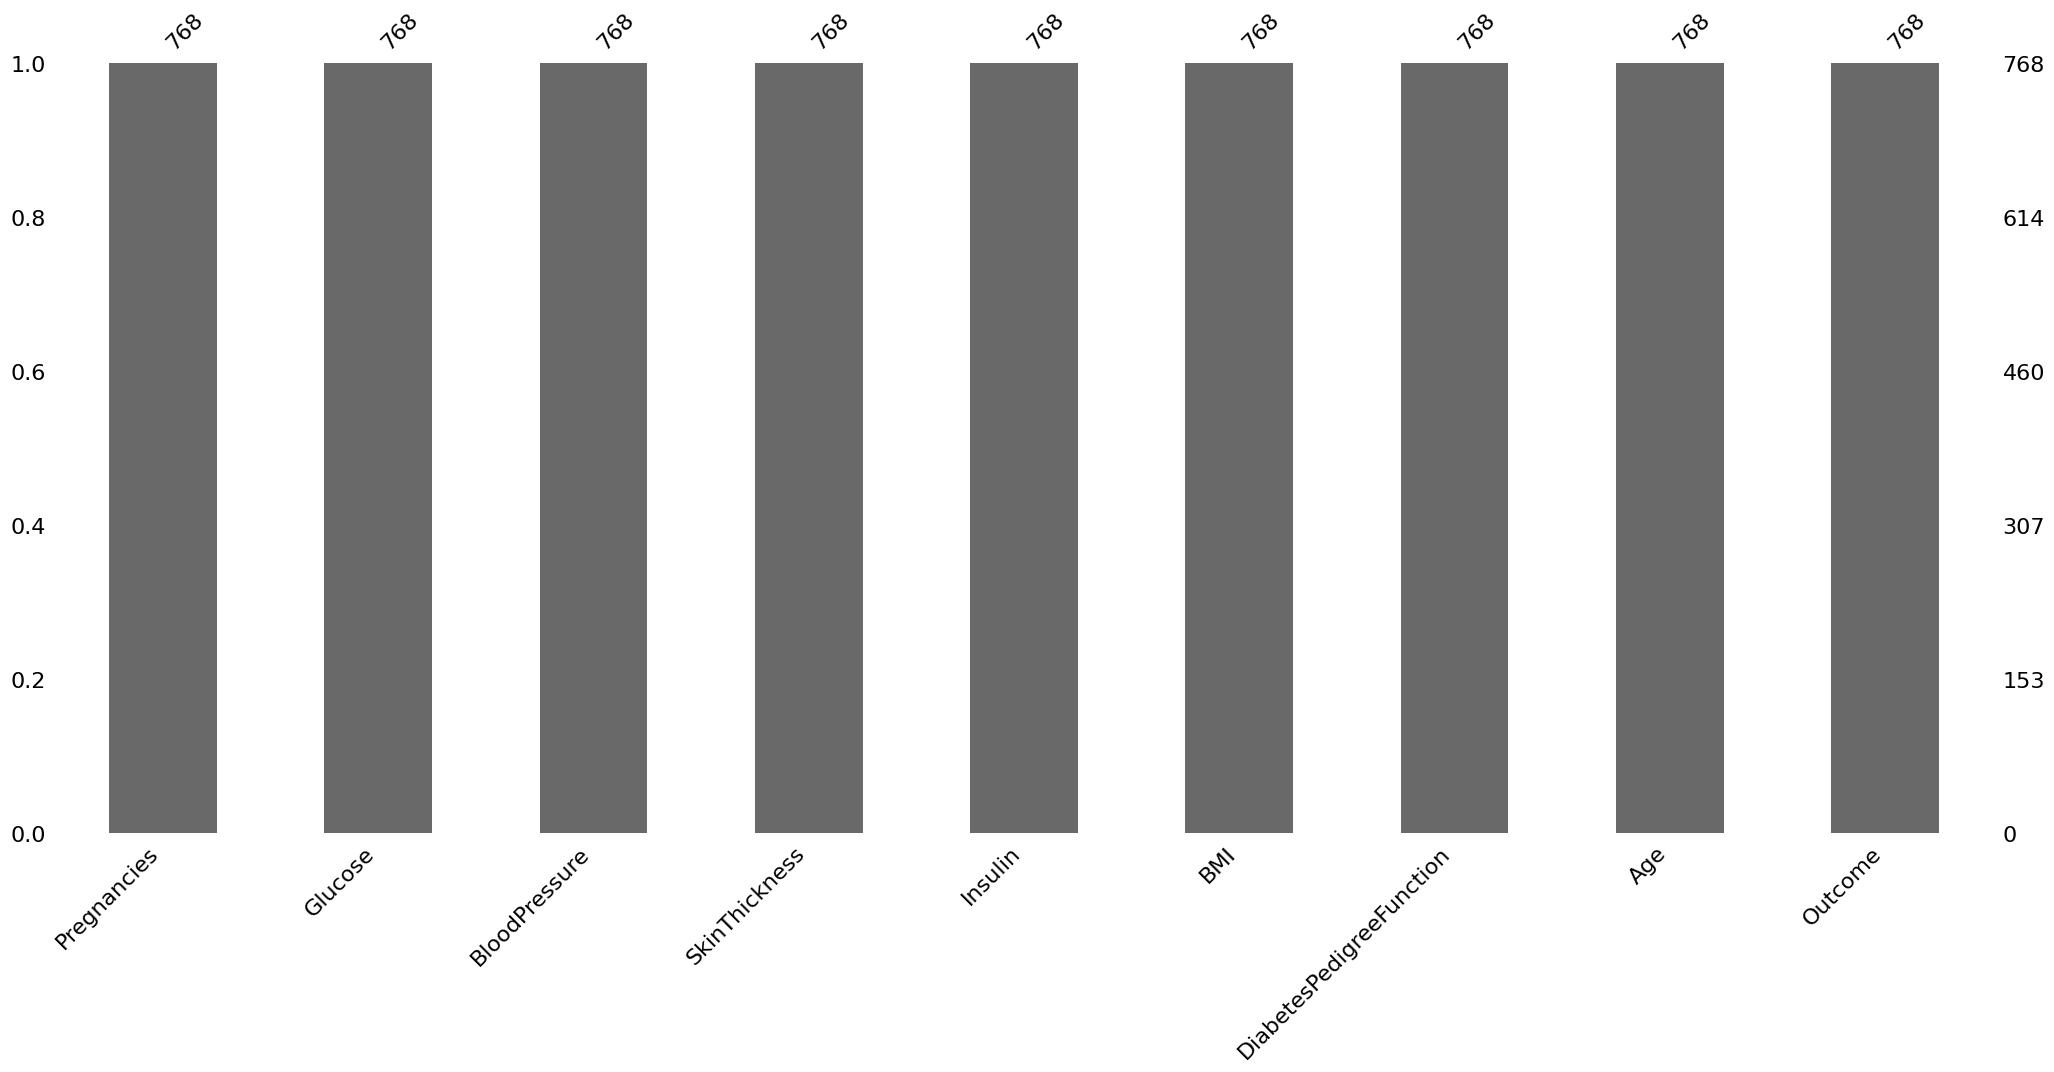

In [10]:
# null count analysis
p=msno.bar(df)

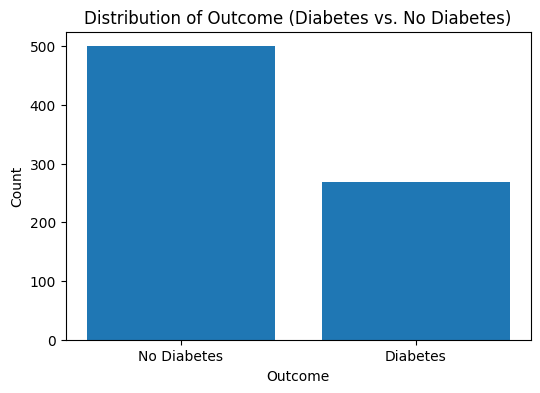

In [11]:
# Count the occurrences of each outcome (0: No diabetes, 1: Diabetes)
outcome_counts = df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, tick_label=['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes vs. No Diabetes)')

# Show the plot
plt.show()

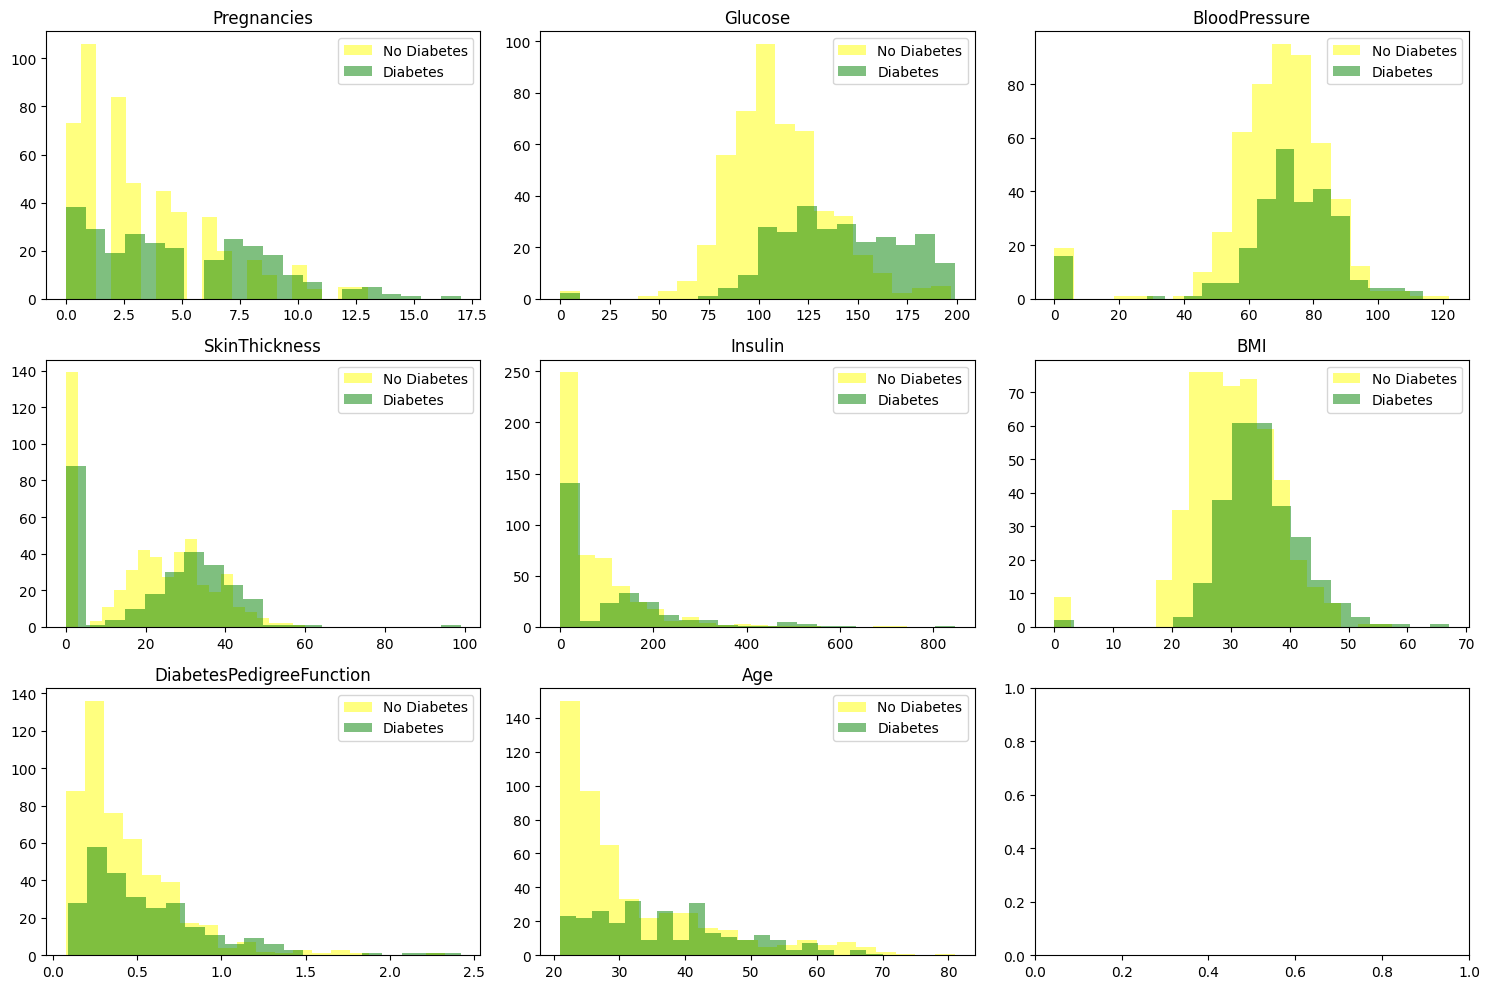

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Features to plot (excluding 'Outcome' which is the target variable)
features = df.columns[:-1]

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[df['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='yellow', bins=20)
    ax.hist(df[df['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='green', bins=20)
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

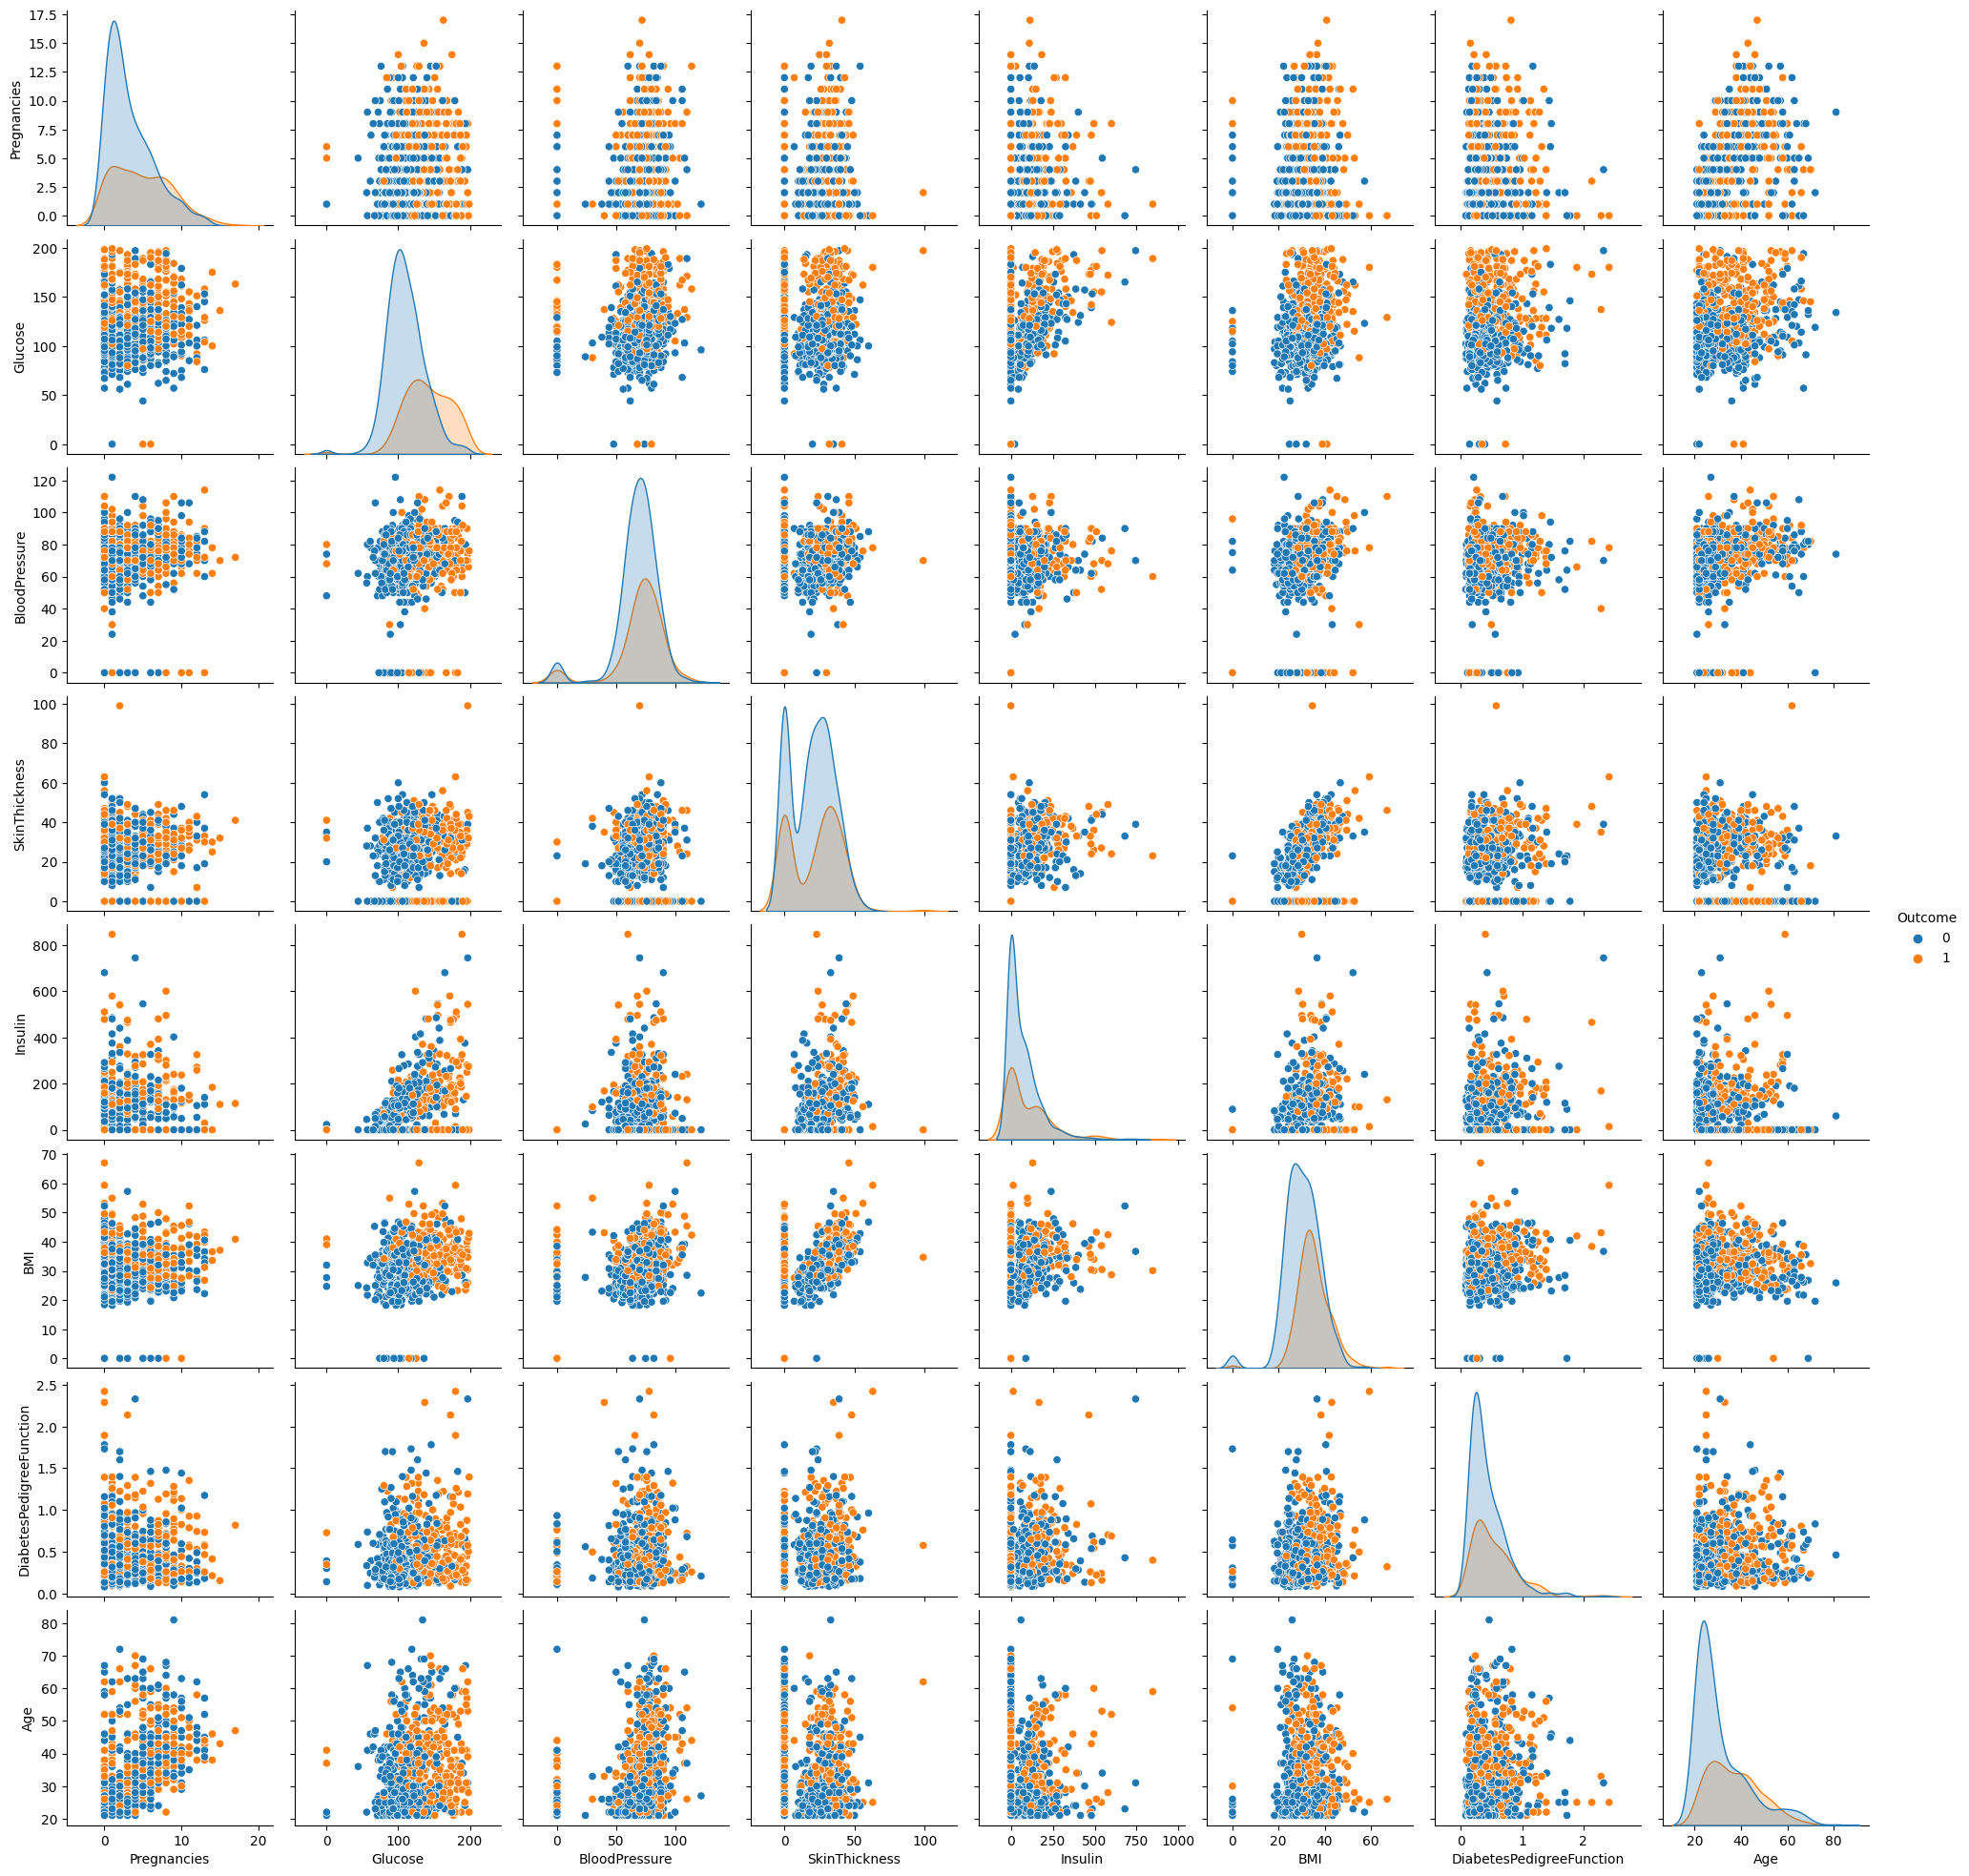

In [15]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

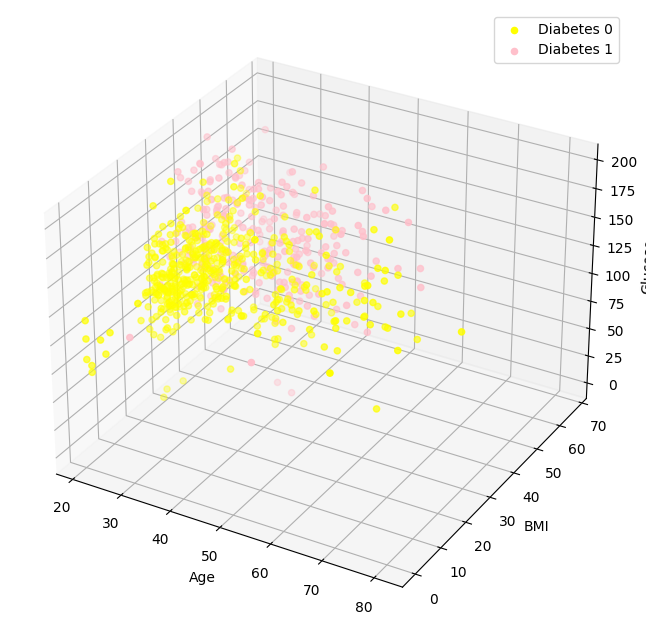

In [16]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for diabetes status (0 for No Diabetes, 1 for Diabetes)
colors = {0: 'yellow', 1: 'pink'}

# Scatter plot with Age on the x-axis, BMI on the y-axis, and Glucose on the z-axis
for outcome, color in colors.items():
    subset = df[df['Outcome'] == outcome]
    ax.scatter(subset['Age'], subset['BMI'], subset['Glucose'], c=color, label=f'Diabetes {outcome}')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()

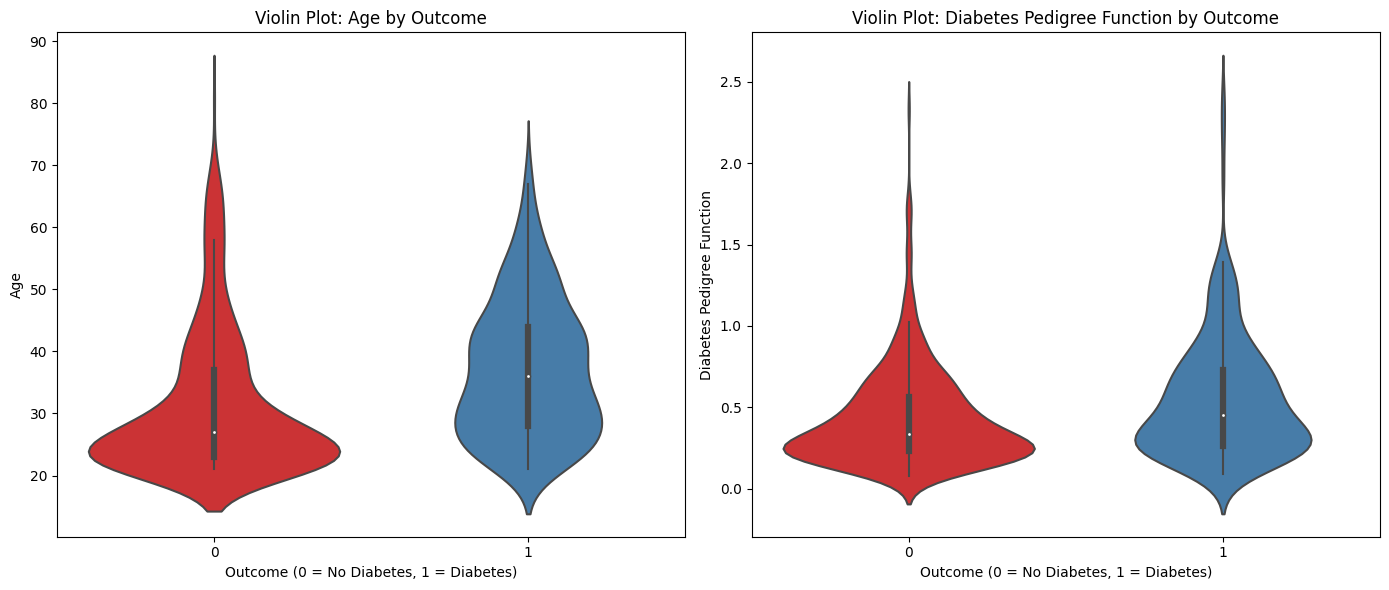

In [17]:
# Create subplots with two violin plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin Plot 1: Age by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='Age', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Violin Plot: Age by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Age')

# Violin Plot 2: Diabetes Pedigree Function by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Violin Plot: Diabetes Pedigree Function by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Diabetes Pedigree Function')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

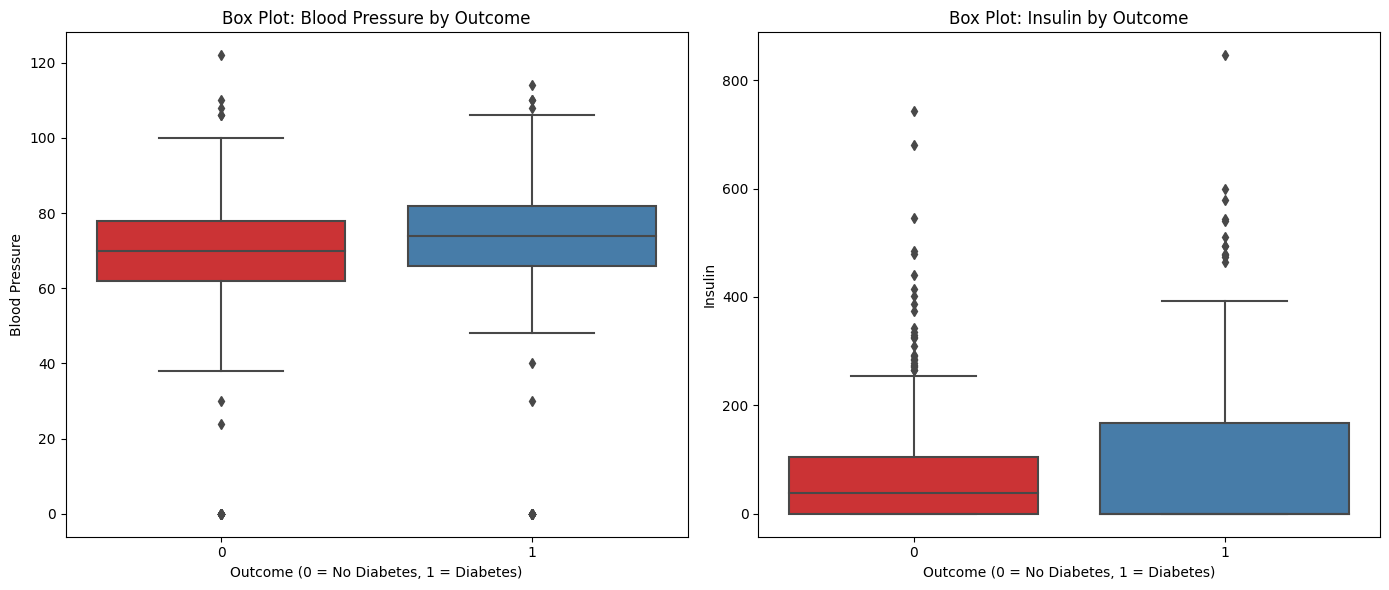

In [18]:
# Create subplots with two box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot 1: Blood Pressure by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='BloodPressure', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot: Blood Pressure by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Blood Pressure')

# Box Plot 2: Insulin by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Box Plot: Insulin by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Insulin')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

In [19]:
# Extract the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
fig = px.pie(y_train,names='Outcome')
fig.update_layout(title='<b>Outcome Proportion before SMOTE Upsampling</b>')
fig.show()

In [23]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(pd.Series(y_train).value_counts())

0    401
1    401
Name: Outcome, dtype: int64


In [24]:
# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('SVM', SVC(kernel='linear', C=1)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB())
]

# Print evaluation results with improved formatting
for name, classifier in classifiers:
    # Fit the model on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    print(f"{name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    print("-" * 50)

Logistic Regression

Accuracy: 0.6948

Confusion Matrix:
[[67 32]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        99
           1       0.56      0.73      0.63        55

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.69      0.70       154

--------------------------------------------------
Random Forest

Accuracy: 0.7727

Confusion Matrix:
[[76 23]
 [12 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        99
           1       0.65      0.78      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

--------------------------------------------------
XGBoost

Accuracy: 0.7208

Confusion Matrix:
[[69 

In [25]:
# Perform 10-fold cross-validation for each model
for name, classifier in classifiers:
    # Create a KFold cross-validator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(classifier, X_train, y_train, cv=kf)

    # Print model name and cross-validation scores
    print(name)

    # Calculate and print the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"Mean Accuracy: {mean_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")

    # Print a separator for better readability
    print("-" * 50)

Logistic Regression
Mean Accuracy: 0.7457
Standard Deviation: 0.0271
--------------------------------------------------
Random Forest
Mean Accuracy: 0.8254
Standard Deviation: 0.0531
--------------------------------------------------
XGBoost
Mean Accuracy: 0.8129
Standard Deviation: 0.0537
--------------------------------------------------
SVM
Mean Accuracy: 0.7407
Standard Deviation: 0.0337
--------------------------------------------------
K-Nearest Neighbors
Mean Accuracy: 0.7880
Standard Deviation: 0.0286
--------------------------------------------------
Naive Bayes
Mean Accuracy: 0.7120
Standard Deviation: 0.0501
--------------------------------------------------
